In [1]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data=pd.read_csv(r'C:\Users\Brij\Desktop\Python for data science\timesData.csv')
data1=data.copy()

In [3]:
data1.index

RangeIndex(start=0, stop=2603, step=1)

In [4]:
data1.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year'],
      dtype='object')

In [5]:
data1.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


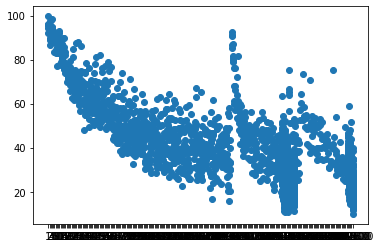

In [6]:
plt.scatter(data1['world_rank'],data1['teaching'])

In [55]:
data1['international'].isna().sum()

0

In [56]:
data1.dropna()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2597,601-800,Xidian University,China,17.9,12.8,12.1,8.9,83.7,-,"31,618",16.4,2%,29 : 71,2016
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


In [57]:
df=data1.head(50)

In [82]:
data1['international'].describe()

count     2603
unique     804
top       20.7
freq        10
Name: international, dtype: object

In [84]:
X=df[['teaching',
       'research', 'citations']].values
y=df['total_score'].values

In [85]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=1)

In [104]:
regg=LinearRegression()

In [105]:
regg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
y_pred=regg.predict(X_test)

In [107]:
from sklearn import metrics

In [108]:
metrics.mean_squared_error(y_test,y_pred)

2.0566417060846818

In [109]:
pd.DataFrame(regg.coef_)

,0
0,0.287748
1,0.323266
2,0.300298


In [112]:
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

,Actual,Predicted
0,75.1,75.232229
1,71.0,70.326503
2,69.0,66.787811
3,69.5,68.293935
4,95.6,93.738884


In [113]:
from sklearn.metrics import r2_score